In [126]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

## Newton's law of gravitation

In [3]:
gravpath = 'C:\Data\grav.csv'

In [4]:
df = pd.read_csv(gravpath)

In [5]:
df['1/rsquared'] = (df['mass1'] * df['mass2']) /  (df['r']**2)

In [6]:
X = df[['1/rsquared']]
y = df['F']

In [7]:
lm = LinearRegression()
lm.fit(X, y)

print ('Gravitational Constant: ' + str(lm.coef_[0]))
print ('Intercept: ' + str(lm.intercept_))

Gravitational Constant: 6.673999999999998e-11
Intercept: -5.293955920339377e-23


## IsHealthy Prediction

In [96]:
genpath = 'C:\Data\gender_cleaned_test_train.xlsx'

In [97]:
train_df = pd.read_excel(genpath, sheet_name='train')
test_df = pd.read_excel(genpath, sheet_name='test')

In [17]:
train_df.head(50)

,IsMale,Height,Weight,identifier,entry_dt,IsHealthy,w/h2,IsHealthy_hat
0,1,187.571423,109.819678,A001,2017-01-20,0,0.003121,0
1,1,174.706036,73.688955,A002,2017-01-20,1,0.002414,0
2,1,188.239668,96.584348,A003,2017-01-20,0,0.002726,0
3,1,182.196685,99.899282,A004,2017-01-20,0,0.003009,0
4,1,177.499761,93.682809,A005,2017-01-20,0,0.002973,0
5,1,170.822660,69.104319,A006,2017-01-20,1,0.002368,0
6,1,174.714106,83.503261,A007,2017-01-20,0,0.002736,0
7,1,173.605229,76.258884,A008,2017-01-20,0,0.002530,0
8,1,170.228132,79.871966,A009,2017-01-20,0,0.002756,0
9,1,161.179495,71.005453,A010,2017-01-20,0,0.002733,0


#### Try with w/h2

In [109]:
train_df['w/h'] = train_df['Weight'] / train_df['Height']
train_df['w/h2'] = train_df['Weight'] / (train_df['Height']**2)

test_df['w/h'] = test_df['Weight'] / test_df['Height']
test_df['w/h2'] = test_df['Weight'] / (test_df['Height']**2)

In [110]:
lgr = LogisticRegression()
X = train_df[['w/h2']]
y = train_df['IsHealthy']
lfit = lgr.fit(X, y)

In [111]:
IsHealthy_hat = lgr.predict(test_df[['w/h2']])
test_df['IsHealthy_hat'] = IsHealthy_hat

In [112]:
accuracy_score(test_df['IsHealthy'], test_df['IsHealthy_hat']) # 0.592288032003556

0.5734265734265734

#### Try with w/h

In [132]:
lgr = LogisticRegression()
X = train_df[['w/h']]
y = train_df['IsHealthy']
lfit = lgr.fit(X, y)

In [133]:
IsHealthy_hat = lgr.predict(X)
train_df['IsHealthy_hat'] = IsHealthy_hat

In [134]:
IsHealthy_hat = lgr.predict(test_df[['w/h']])
test_df['IsHealthy_hat'] = IsHealthy_hat

In [135]:
accuracy_score(test_df['IsHealthy'], test_df['IsHealthy_hat']) # 0.9263251472385821

0.9340659340659341

In [136]:
confusion_matrix(test_df['IsHealthy'], test_df['IsHealthy_hat'])

array([[542,  32],
       [ 34, 393]], dtype=int64)

In [137]:
roc_curve(test_df['IsHealthy'], test_df['IsHealthy_hat'])

(array([0.        , 0.05574913, 1.        ]),
 array([0.        , 0.92037471, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [138]:
roc_auc_score(test_df['IsHealthy'], test_df['IsHealthy_hat'])

0.9323127891700462

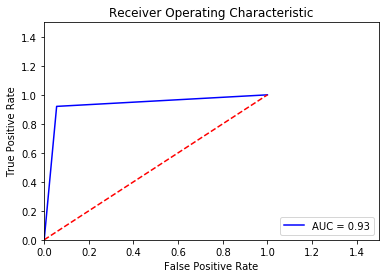

In [139]:
fpr, tpr, threshold = roc_curve(test_df['IsHealthy'], test_df['IsHealthy_hat'])
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Try with w/h2 between range

In [120]:
train_df['w/h2'] = (train_df['Weight']/(train_df['Height']**2)).between(0.00185,0.0025)

lgr = LogisticRegression()
lgr.fit(train_df[['w/h2']],train_df['IsHealthy'])
test_df['w/h2'] = (test_df['Weight']/(test_df['Height']**2)).between(0.00185,0.0025)
test_df['IsHealthy_hat']=lgr.predict(test_df[['w/h2']])

In [121]:
accuracy_score(test_df['IsHealthy'], test_df['IsHealthy_hat']) # 0.9263251472385821

1.0

In [122]:
confusion_matrix(test_df['IsHealthy'], test_df['IsHealthy_hat'])

array([[574,   0],
       [  0, 427]], dtype=int64)

In [123]:
roc_curve(test_df['IsHealthy'], test_df['IsHealthy_hat'])

(array([0., 1.]), array([1., 1.]), array([1, 0], dtype=int64))

In [124]:
roc_auc_score(test_df['IsHealthy'], test_df['IsHealthy_hat'])

1.0

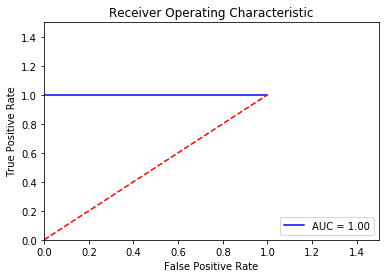

In [131]:
fpr, tpr, threshold = roc_curve(test_df['IsHealthy'], test_df['IsHealthy_hat'])
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()